## Plotting muon spectrum and KamLAND mountain contour from muonflux generated file

The file "MuonFlux-KamLAND-Generate.dat" consists of $10^5$ muon energies that are simulated according to the muon energy distribution - that is in turn simulated by MUSIC - at KamLAND. The three columns of the file are the following: \
|  cos($\theta$) [in radians]  |  $\phi$ [in degrees]  |  $E$ [in GeV]  import matplotlib.pyplot as plt
import numpy as np
import math|

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

The file is opened and new lists are created containing $\theta$ (degrees), $\phi$ (degrees), $E$ (GeV)

In [4]:
def open_file(file_name):

    srcefile = open(file_name, 'r')
    theta_list, phi_list, energy_list = [], [], []

    for line in srcefile:
        data = line.split()
        costheta, phi, energy = data

        # obtain the theta in degrees instead of radians
        theta = math.acos(float(costheta)) * (180 / np.pi)
        theta_list.append(theta)
        phi_list.append(float(phi))
        energy_list.append(float(energy))

    return theta_list, phi_list, energy_list

In [22]:
theta_list, phi_list, energy_list = open_file("/project/xenon/kweerman/exercises/MuonFlux-KamLAND-Generate.dat")

The open_file() function can be used to plot the energy distribution (the following cell) and mountain contour (last cells). 

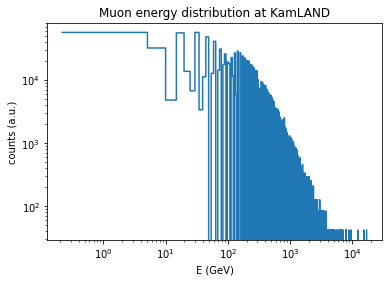

In [27]:
def plot_muonspectrum(theta_list, phi_list, energy_list):
    
    #theta_list, phi_list, energy_list = open_file(file_name)
    
    # compute histogram counts and bin edges
    counts, bins = np.histogram(energy_list, bins='auto') 

    # the last is not the edge of a bin but rather the upper limit of the last bin
    # so we do not take that with us when plotting -> [:-1]
    plt.plot(bins[:-1], counts, drawstyle='steps-post')

    #maxE = max(energy_list)
    #plt.hist(energy_list, bins='auto', histtype='step')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('E (GeV)')
    plt.ylabel('counts (a.u.)')
    plt.title('Muon energy distribution at KamLAND')
    #plt.savefig("muonspectrum.png")

    return

plot_muonspectrum(theta_list, phi_list, energy_list)

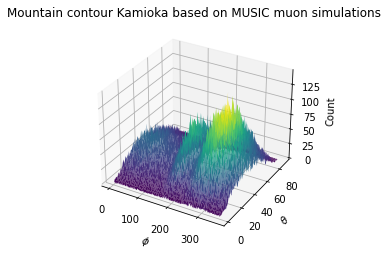

In [28]:
def mountain_surfaceplot(theta_list, phi_list, energy_list):

    #theta_list, phi_list, energy_list = open_file(file_name)

    #hist, xedges, yedges = np.histogram2d(phi_list, theta_list, bins=600)
    zpos, edges = np.histogramdd((phi_list, theta_list), bins=(350, 90))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the bin centers
    xpos, ypos = 0.5 * (edges[0][:-1] + edges[0][1:]), 0.5 * (edges[1][:-1] + edges[1][1:])
    xpos, ypos = np.meshgrid(xpos, ypos, indexing='ij')

    # Plot the 3D histogram as a bar graph
    ax.plot_surface(xpos, ypos, zpos, cmap='viridis', edgecolor='none')

    # set the labels of the x, y, and z axes
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\theta$')
    ax.set_zlabel('Count')
    ax.set_title('Mountain contour Kamioka based on MUSIC muon simulations')

    # show the plot
    #plt.savefig("muonsmountain.png")

mountain_surfaceplot(theta_list, phi_list, energy_list)

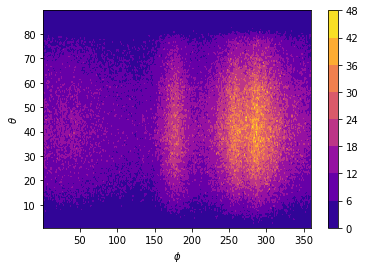

In [29]:
def mountain_contour(theta_list, phi_list, energy_list):

    #theta_list, phi_list, energy_list = open_file(file_name)
    H, edges = np.histogramdd((phi_list, theta_list), bins=(2*350, 2*90))
    fig, ax = plt.subplots()

    # Get the bin centers
    xpos, ypos = 0.5 * (edges[0][:-1] + edges[0][1:]), 0.5 * (edges[1][:-1] + edges[1][1:])
    xpos, ypos = np.meshgrid(xpos, ypos, indexing='ij')

    contours = plt.contourf(xpos, ypos, H, cmap = 'plasma')
    cbar = plt.colorbar(contours)

    # set the labels of the x, y, and z axes
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\theta$')

    # show the plot
    #plt.savefig("muonsmountaincontour.png")

mountain_contour(theta_list, phi_list, energy_list)

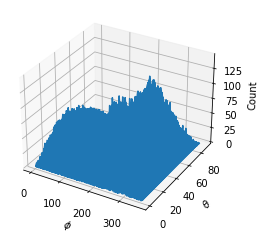

In [30]:
def mountain_histogram(theta_list, phi_list, energy_list):

    #theta_list, phi_list, energy_list = open_file(file_name)

    #hist, xedges, yedges = np.histogram2d(phi_list, theta_list, bins=600)
    H, edges = np.histogramdd((phi_list, theta_list), bins=(350, 90))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the bin centers
    xpos, ypos = 0.5 * (edges[0][:-1] + edges[0][1:]), 0.5 * (edges[1][:-1] + edges[1][1:])
    xpos, ypos = np.meshgrid(xpos, ypos, indexing='ij')
    xpos, ypos = xpos.ravel(), ypos.ravel()

    # Get the bin heights
    zpos = np.zeros_like(H.ravel())
    dx = 0.5 * np.ones_like(zpos)
    dy = dx.copy()
    dz = H.ravel()

    # Plot the 3D histogram as a bar graph
    #ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.5)
    ax.plot(xpos, ypos, zpos + dz)

    # set the labels of the x, y, and z axes
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$\theta$')
    ax.set_zlabel('Count')

    # show the plot
    #plt.savefig("mountainmuons2.png")

mountain_histogram(theta_list, phi_list, energy_list)

